In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img # For image operations
from tensorflow.keras.models import Sequential # These are required for building our new model
from tensorflow.keras.layers import Dense # These are required for building our new model
from tensorflow.keras.applications.vgg16 import VGG16  # The Transfer Learning model to be used in this project...
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from PIL import Image # Python Imaging Library - For operations like: Image open, resize image, etc..
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# First we will define our train and test image paths...
train_files_path = "airplanedataset/Train/"
test_files_path = "airplanedataset/Test/"

# Let's load any airplane image from our dataset..
img = load_img(test_files_path + "B-52/3-1.jpg")


In [6]:
# What is the size?
print(img_to_array(img).shape)

(230, 266, 3)


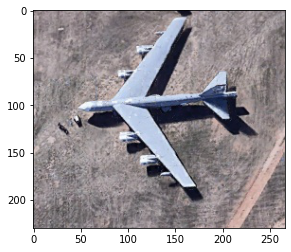

In [7]:
# Let's see this airplane, check if we can see it correctly?
plt.imshow(img)
plt.show()

In [8]:
# Let's build our train and test datasets from the directories of airplane images..
train_data = ImageDataGenerator().flow_from_directory(train_files_path,target_size = (224,224))
test_data = ImageDataGenerator().flow_from_directory(test_files_path,target_size = (224,224))


Found 1812 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [9]:
numberOfAirplaneTypes = 5  # If you have added other planes types (with airplane images in directories of course)
                           # then you must change this number...
                           # uçak tipi sayısı 5 olduğu için 5 verilir



In [10]:
# Let's build our model object.. 
vgg = VGG16()

553476096/553467096 [==============================] - 14s 0us/step


In [11]:
vgg_layers = vgg.layers
print(vgg_layers)

[<keras.engine.input_layer.InputLayer object at 0x7f1c3d01fcd0>, <keras.layers.convolutional.Conv2D object at 0x7f1c3529a090>, <keras.layers.convolutional.Conv2D object at 0x7f1c32580610>, <keras.layers.pooling.MaxPooling2D object at 0x7f1c32580d10>, <keras.layers.convolutional.Conv2D object at 0x7f1c31cd0210>, <keras.layers.convolutional.Conv2D object at 0x7f1c31cd3f50>, <keras.layers.pooling.MaxPooling2D object at 0x7f1c31ce5290>, <keras.layers.convolutional.Conv2D object at 0x7f1c31ce5890>, <keras.layers.convolutional.Conv2D object at 0x7f1c352e3090>, <keras.layers.convolutional.Conv2D object at 0x7f1c31c6ccd0>, <keras.layers.pooling.MaxPooling2D object at 0x7f1c31c73d90>, <keras.layers.convolutional.Conv2D object at 0x7f1c32580190>, <keras.layers.convolutional.Conv2D object at 0x7f1c31c7d750>, <keras.layers.convolutional.Conv2D object at 0x7f1c31ce09d0>, <keras.layers.pooling.MaxPooling2D object at 0x7f1c31c88790>, <keras.layers.convolutional.Conv2D object at 0x7f1c31c8c110>, <kera

In [12]:
# I'm gonna build a new Sequential model and I will add the all the layers from the Vgg16 model to my new model except 
# the last layer which is the output layer! Because I will build my own output layer according to my 
# input classes (which are the types of my military aircrafts)... 
# For this I define vggmodel_layersize_tobe_used = len(vgg_layers) - 1 (minus 1 means I omit the last layer - the output layer)
vggmodel_layersize_tobe_used = len(vgg_layers) - 1

model = Sequential()
for i in range(vggmodel_layersize_tobe_used):
    model.add(vgg_layers[i])

In [13]:
# Since I don't want to re-train all the original 16 layers of VGG16
# which has about 138 million (approx) parameters. VGG model has good train parameters, I will use them!!
for layers in model.layers:
    layers.trainable = False

# Since I have omitted the original output layer of VGG16, I have to add my new output layer to my new model!
model.add(Dense(numberOfAirplaneTypes, activation="softmax"))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [14]:
# After model design is complete, it's time to compile...
model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

In [15]:

batch_size = 4 

model.fit_generator(train_data,
                           steps_per_epoch=400//batch_size,
                           epochs= 3, # You can increase epoch size if you have a computer with good specs...
                           validation_data=test_data,
                           validation_steps= 200//batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/3
100/100 [==============================] - 1089s 11s/step - loss: 0.6239 - accuracy: 0.8206 - val_loss: 0.2044 - val_accuracy: 0.9300


In [19]:
# Let's load an aircraft image and rescale it to the resolution of 224x224 which VGG16 requires..
img = Image.open("f22.jpg").resize((224,224))

In [20]:
# We must convert it to array for operations...
img = np.array(img)

In [21]:
# Let's look it's shape..
img.shape

(224, 224, 3)

In [22]:
print(img.ndim)

3


In [23]:
# We have to add an extra dimension to our array so we will reshape it.. 
img = img.reshape(-1,224,224,3)   # with reshape(-1,..) I'm adding 1 extra dimension..
                                  # I do this because my model requires 4 dim array!

In [24]:
# Let's look it's shape..
print(img.shape)
print(img.ndim)

(1, 224, 224, 3)
4


In [25]:
# I will scale input pixels between -1 and 1 using my model's preprocess_input
# VGG16 model requires it..
img = preprocess_input(img) 

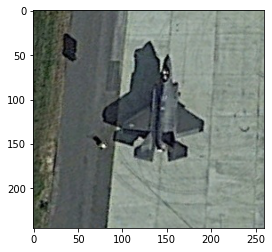

In [30]:
# Let's see the aircraft..
img_for_display = load_img("14-1.jpg")
plt.imshow(img_for_display)
plt.show()

In [31]:
preds = model.predict(img)

In [32]:
# Let's see contents of prediction array.. 
preds

array([[0.07036973, 0.01433425, 0.84472877, 0.04875978, 0.02180739]],
      dtype=float32)

In [37]:
image_classes = ["A-10 Thunderbolt","Boeing B-52","Boeing E-3 Sentry","F-22 Raptor","KC-10 Extender"]

result = np.argmax(preds[0])
print(image_classes[result]) 

Boeing E-3 Sentry
